In [27]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


<Axes: ylabel='count'>

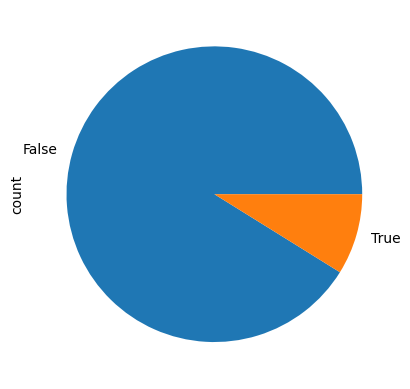

In [4]:
df['job_work_from_home'].value_counts().plot(kind='pie')

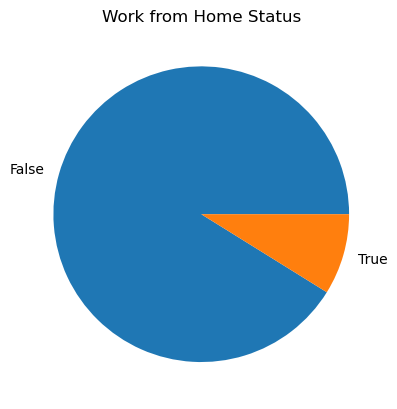

In [6]:
#Clean up:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

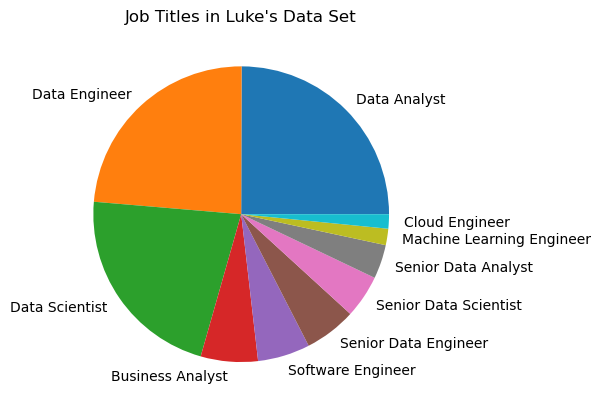

In [9]:
#Looking at job title short via a pie chart:
#Clean up:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles in Luke's Data Set") #double quotes instead of single so an apostrophe can be used
plt.ylabel('')
plt.show()

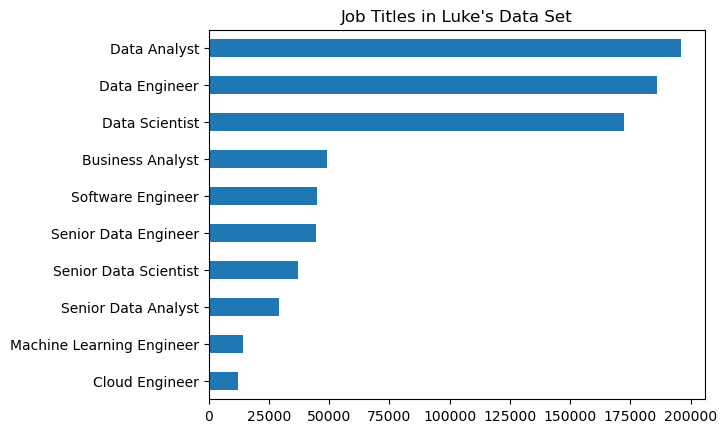

In [12]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title("Job Titles in Luke's Data Set") #double quotes instead of single so an apostrophe can be used
plt.gca().invert_yaxis() #invert yaxis
plt.ylabel('')
plt.show()

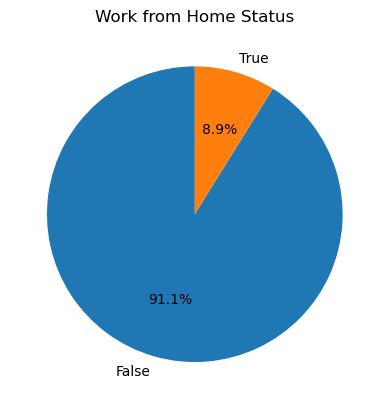

In [16]:
#customize the original pie chart:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

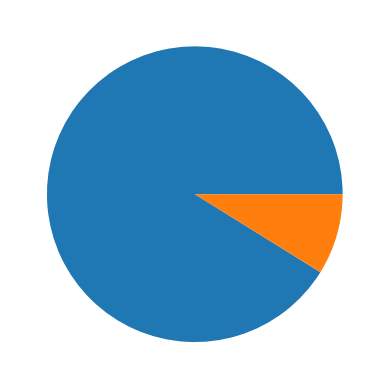

In [17]:
fig, ax = plt.subplots()

ax.pie(df['job_work_from_home'].value_counts())

plt.show()


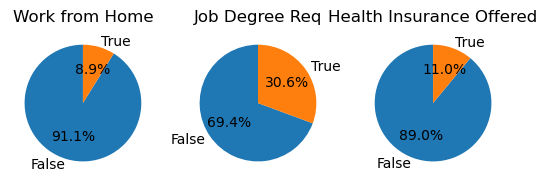

In [21]:
#create a loop to create 3 pie charts:

#we weant 1 row and 3 columns
fig, ax = plt.subplots(1, 3)

#create a dictionary to loop through for each pie chart
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

#create the for loop
# i = index from the dict
# then the tuple of the dict, column (key): title (value)
for i, (column, title) in enumerate(dict_column.items()):
    
    #print(i, column, title) - test to show the loop output
    
    #ax.pie(df['job_work_from_home'].value_counts()) - format for plotting
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

🟩 Health Insurance Pie Chart (2.14.1) - Problem
Matplotlib Pie Plots
Problem Statement:
Create a pie chart to show the proportion of job postings that mention health insurance for Data Analyst roles only:

Create a new DataFrame called df_DA that only gets Data Analyst roles.
Then count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
Set the title to 'Proportion of Data Analyst Jobs Mentioning Health Insurance'.

In [24]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA['job_health_insurance'].value_counts()

job_health_insurance
False    171351
True      24724
Name: count, dtype: int64

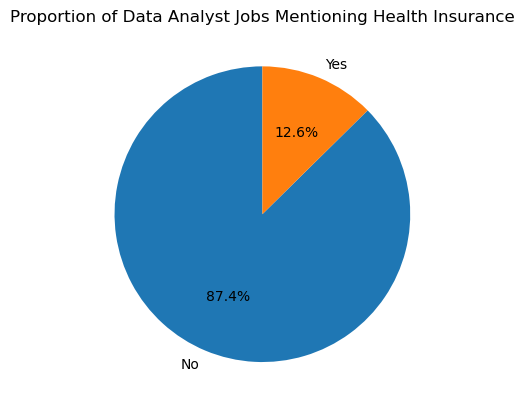

In [25]:
df_DA['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.ylabel('')
plt.show()

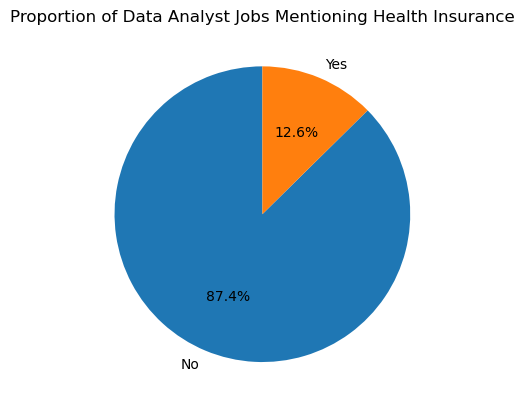

In [26]:
#Final Solution:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
health_insurance_counts = df_DA['job_health_insurance'].value_counts()
plt.pie(health_insurance_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Data Analyst Jobs Mentioning Health Insurance')
plt.show()

🟨 Job Schedule Distribution (2.14.2) - Problem
Matplotlib Pie Plots
Problem Statement:
Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.
Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
Plot this using plt.pie(), setting labels parameter to the index, startangle to 90, and format values to display similarly to 23.1%.
Add a title 'Job Schedule Full-time vs. Part-time'.

In [35]:
#df_ft_pt = df[df['job_schedule_type'] == ('Full-time') or df['job_schedule_type'] == ('Part-time')].copy()
df_ft_pt = df[df['job_schedule_type'].isin(['Full-time', 'Part-time'])].copy()
df_ft_pt.head()
df_ft_pt['job_schedule_type'].value_counts()

job_schedule_type
Full-time    701727
Part-time      7881
Name: count, dtype: int64

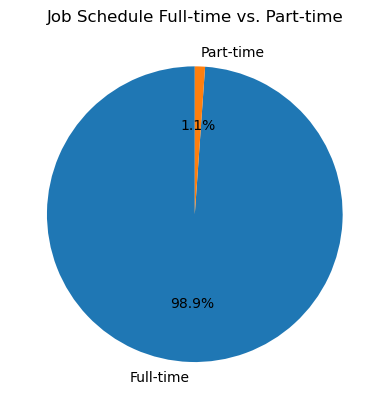

In [38]:
job_type = df_ft_pt['job_schedule_type'].value_counts()
#plt.pie(job_type, labels=['Full-time', 'Part-time'], autopct='%1.1f%%', startangle=90)
plt.pie(job_type, labels=job_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Schedule Full-time vs. Part-time')
plt.show()

🟥 Degree Mentioned Pie Chart (2.14.3) - Problem
Matplotlib Pie Plots
Problem Statement:
Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.
Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
Use the job_no_degree_mention column for this purpose.
Customize the pie chart by exploding the slice for jobs that do not mention a degree. (Use the explode parameter set to (0, 0.1) inside of plt.pie())
Set the chart title as 'Distribution of Jobs Mentioning Degrees for US Job Postings'.

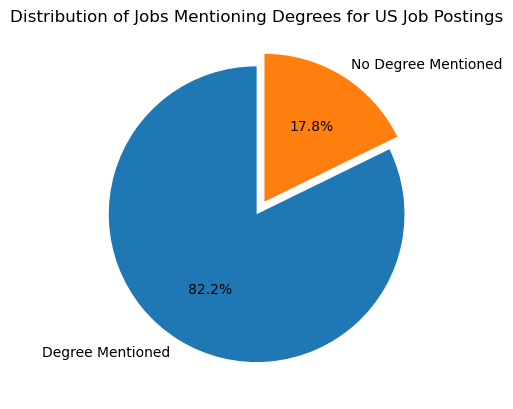

In [43]:
df_US = df[df['job_country'] == 'United States'].copy()
job_degree_type = df_US['job_no_degree_mention'].value_counts()
#plt.pie(job_degree_type, labels=job_degree_type.index, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.pie(job_degree_type, labels=['Degree Mentioned', 'No Degree Mentioned'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()

In [45]:
job_degree_type = df_US['job_no_degree_mention'].value_counts()
job_degree_type

job_no_degree_mention
False    169655
True      36637
Name: count, dtype: int64